**high cheating**

In [363]:
import pandas as pd

In [364]:
data1=pd.read_csv('high_cheating.csv')

In [365]:
data1.head()

,Q1,Q2,Midterm,Q3,Q4,Final
0,51,56,56,59,50,56
1,54,57,54,57,51,51
2,59,58,52,53,56,56
3,59,59,51,55,51,50
4,55,56,56,52,56,59


In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

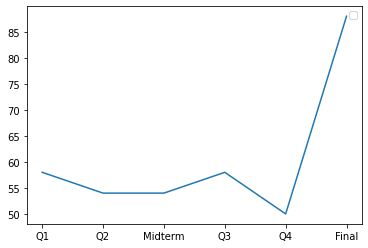

In [367]:
first_row = data1.iloc[-1]

# Plot the first row
plt.plot(first_row)
plt.legend()
# Show the plot
plt.show()

**less cheating**

In [368]:
data2=pd.read_csv('less_cheating.csv')

In [369]:
data2.head()

,Q1,Q2,Midterm,Q3,Q4,Final
0,51,56,56,59,50,56
1,54,57,54,57,51,51
2,59,58,52,53,56,56
3,59,59,51,55,51,50
4,55,56,56,52,56,59


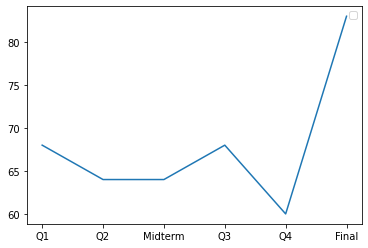

In [371]:
first_row = data2.iloc[-1]

# Plot the first row
plt.plot(first_row)
plt.legend()
# Show the plot
plt.show()

**less cheating increasing grades**

In [372]:
data3=pd.read_csv('less_cheating_increasing_grades.csv')

In [373]:
data3.head()

,Q1,Q2,Midterm,Q3,Q4,Final
0,51,56,56,59,50,56
1,54,57,54,57,51,51
2,59,58,52,53,56,56
3,59,59,51,55,51,50
4,55,56,56,52,56,59


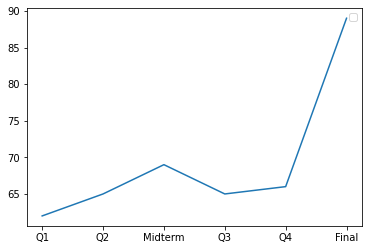

In [247]:
first_row = data3.iloc[-1]

# Plot the first row
plt.plot(first_row)
plt.legend()
# Show the plot
plt.show()

In [248]:
data4=pd.read_csv('less_cheating_increasing_grades2.csv')

In [249]:
data4.head()

,Q1,Q2,Midterm,Q3,Q4,Final
0,51.0,56.0,56.0,59.0,50.0,64.4
1,56.0,54.0,57.0,54.0,57.0,65.6
2,51.0,51.0,59.0,58.0,52.0,64.2
3,53.0,56.0,56.0,59.0,59.0,66.6
4,51.0,55.0,51.0,50.0,55.0,62.4


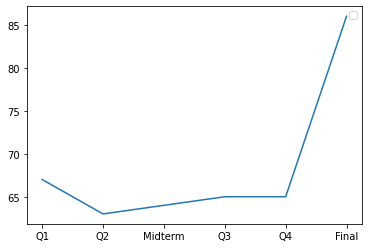

In [250]:
first_row = data4.iloc[-1]

# Plot the first row
plt.plot(first_row)
plt.legend()
# Show the plot
plt.show()

In [251]:
data2['detection'] = ['normal']*100 + ['cheating']*10


In [252]:
data1['detection'] = ['normal']*100 + ['cheating']*10

In [253]:
data3['detection'] = ['normal']*100 + ['cheating']*10

In [254]:
data4['detection'] = ['normal']*100 + ['cheating']*10

In [255]:
frames = [data1, data2, data3,data4]

dataframe = pd.concat(frames)

In [256]:
dataframe

,Q1,Q2,Midterm,Q3,Q4,Final,detection
0,51.0,56.0,56.0,59.0,50.0,56.0,normal
1,54.0,57.0,54.0,57.0,51.0,51.0,normal
2,59.0,58.0,52.0,53.0,56.0,56.0,normal
3,59.0,59.0,51.0,55.0,51.0,50.0,normal
4,55.0,56.0,56.0,52.0,56.0,59.0,normal
...,...,...,...,...,...,...,...
105,64.0,60.0,60.0,64.0,60.0,87.0,cheating
106,66.0,63.0,69.0,62.0,65.0,88.0,cheating
107,67.0,69.0,60.0,60.0,64.0,91.0,cheating
108,65.0,65.0,62.0,64.0,68.0,88.0,cheating


In [257]:
from sklearn.model_selection import train_test_split

In [314]:
classes = dataframe['detection'].copy()
features = dataframe.drop(['detection'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features,classes , test_size=0.2,random_state=42,shuffle=True)

In [315]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
scaler = LabelEncoder()


In [316]:
y_test

45       normal
78       normal
17       normal
35       normal
107    cheating
         ...   
57       normal
27       normal
24       normal
17       normal
66       normal
Name: detection, Length: 88, dtype: object

In [322]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [317]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
y_train = label.fit_transform(y_train)

In [318]:
y_test = label.fit_transform(y_test)

In [319]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten, Conv1D ,MaxPooling1D

In [323]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [345]:
model = keras.Sequential([
    layers.LSTM(2, input_shape=x_train[0].shape, return_sequences=True),
    layers.LSTM(1),
    layers.Dropout(0.8),
    layers.Dense(2, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])


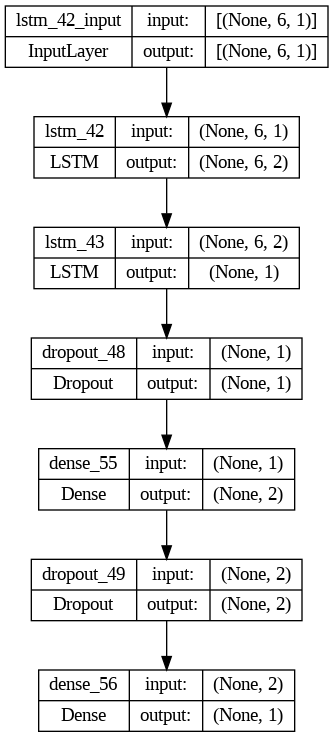

In [374]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [346]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
    
)

In [347]:
history = model.fit(x_train, y_train,epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
11/11 [==============================] - 25s 112ms/step - loss: 0.7271 - accuracy: 0.7443 - val_loss: 0.7135 - val_accuracy: 0.4545
Epoch 2/50
11/11 [==============================] - 0s 11ms/step - loss: 0.7047 - accuracy: 0.8494 - val_loss: 0.6981 - val_accuracy: 0.5795
Epoch 3/50
11/11 [==============================] - 0s 13ms/step - loss: 0.6882 - accuracy: 0.8551 - val_loss: 0.6839 - val_accuracy: 0.6477
Epoch 4/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6737 - accuracy: 0.8693 - val_loss: 0.6713 - val_accuracy: 0.7500
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6677 - accuracy: 0.8580 - val_loss: 0.6593 - val_accuracy: 0.9091
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 0.6637 - accuracy: 0.8494 - val_loss: 0.6471 - val_accuracy: 0.9205
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.6468 - accuracy: 0.8807 - val_loss: 0.6353 - val_accuracy: 0.9205
Epoch 8/50


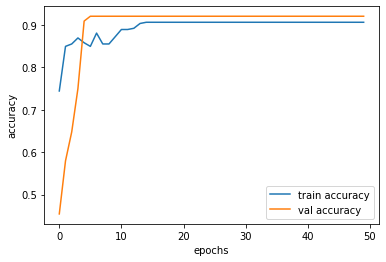

In [348]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

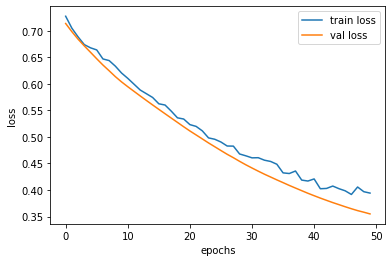

In [349]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [350]:
ypred=model.predict(x_test)

3/3 [==============================] - 1s 5ms/step


In [351]:
ypred = (ypred>0.5)

In [352]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [353]:
accuracy_score(y_test, ypred)

0.9204545454545454

In [354]:
from sklearn import metrics

In [355]:
macro_averaged_precision = metrics.precision_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.4602272727272727


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [356]:
macro_averaged_recall = metrics.recall_score(y_test, ypred, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.5


In [357]:
macro_averaged_f1 = metrics.f1_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.47928994082840237


In [358]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [359]:
import numpy as np

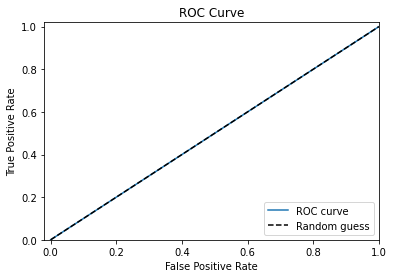

In [360]:
fpr, tpr, thresholds = roc_curve(y_test,ypred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

<AxesSubplot:>

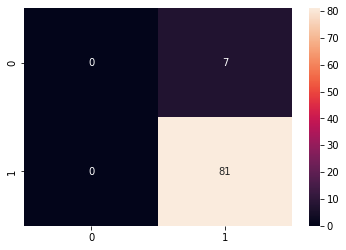

In [361]:
cm = confusion_matrix(y_test,ypred)
sns.heatmap(cm, annot=True, fmt="d")